## Homework 1

Consider the coin tossing example, discussed in the first lecture. Simulate
1000 tosses of the coins, setting $H = 0.3$. Consider a uniform prior and
update the posterior at each toss. Plot the resulting posterior after 1, 50,
100, 300, 700, 1000 tosses. Repeat the simulated experiment by setting
a Gaussian prior centered in $H = 0.5$, with standard deviation $\sigma= 0.1$.
Do both posteriors converge a similar distribution in the end? What does
that mean? Which posterior converges faster and why? 

## Answer

In the following code, we are simulating 1000 coin tosses for a biased coin, which will give heads only 30\% of the time. The task is to check whether the posterior (basically given by the product of the likelihood and the prior) is going to correctly converge to the right distribution, centered in $H=0.3$, and how long it will take to do that.
The likelihood is given by a binomial distribution, while for the prior we make two different choices: first, we assume a uniform distribution, which is equivalent to saying we know nothing about this coin; then we try with a Gaussian peaked at $H=0.5$, meaning that we are pretty convinced that the coin is fair.
 
My final results are plotted just below.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from numpy.random import random, seed
plt.rcParams['axes.xmargin'] = 0
plt.rcParams['axes.ymargin'] = 0
%matplotlib widget


In [2]:
sigma = 0.1
mu = 0.5

# we define here a function holding the product between likelihood and prior
# first we assume a uniform prior, than a Gaussian one
# rememeber that the likelihood is in given by a binomial in both cases

def uniform(H,R,N):
    return H**R*(1-H)**(N-R)

def gaussian(H,R,N):
    return H**R*(1-H)**(N-R) * 1/(np.sqrt(2*np.pi)*sigma) * np.exp(-0.5*(H-mu)**2/sigma**2)

In [3]:
# generating random numbers
N = int(1000)
np.random.seed(100)
a = random(N)
#print(a)


Nvec = [0, 1, 2, 8, 50, 100, 300, 700, 1000]

# define an array covering all possible H values, we're going to use it in the plot
Hvec = np.arange(0,1,0.01)

0.0
0.5
0.375
0.42
0.35
0.30333333333333334
0.2985714285714286
0.305


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
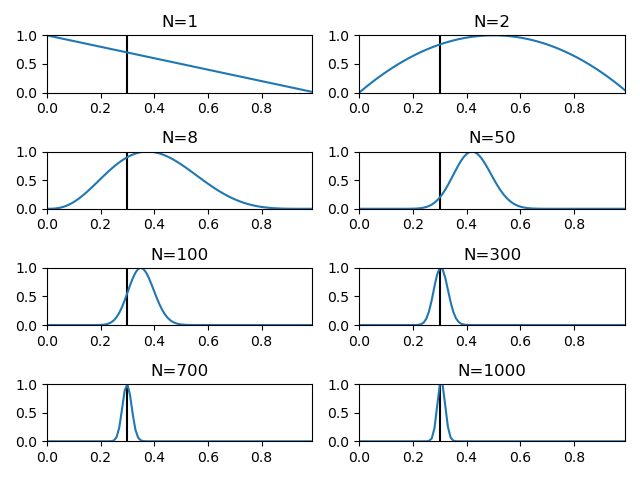

In [4]:
# core of the code: counting of heads (R), print the distribution with the simulated R and check consistency 
# with the actual value of the biassed coin (H=0.3), represented by a vertical black line

# we also print H at every step just to check how the the simulation is going

R = 0
fig = plt.figure()

for j in range(8):

    for i in range(Nvec[j], Nvec[j+1]):
        if(a[i]<=0.3):
            R += 1
    H = R/Nvec[j+1]
    print(H)

    
    output = uniform(Hvec, R, Nvec[j+1])
    output /= max(output)
    ax = fig.add_subplot(4,2,j+1)
    tit = "N="+str(Nvec[j+1])
    ax.set_title(tit)
    plt.plot(Hvec, output)
    plt.vlines(0.3,0,1, color="black")


plt.tight_layout()
plt.show()

0.0
0.5
0.375
0.42
0.35
0.30333333333333334
0.2985714285714286
0.305


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
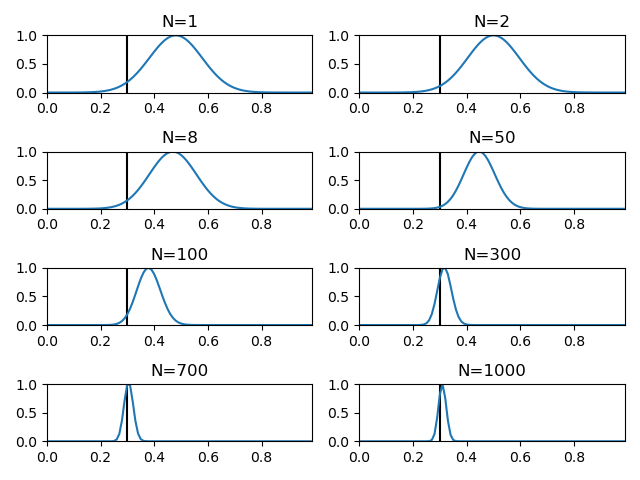

In [5]:
# same as previous cell but with different prior

R=0
fig2 = plt.figure()

for j in range(8):

    for i in range(Nvec[j], Nvec[j+1]):
        if(a[i]<=0.3):
            R += 1
    H = R/float(Nvec[j+1])
    print(H)

    
    output = gaussian(Hvec, R, Nvec[j+1])
    output /= max(output)
    ax2 = fig2.add_subplot(4,2,j+1)
    tit = "N="+str(Nvec[j+1])
    ax2.set_title(tit)
    plt.plot(Hvec, output)
    plt.vlines(0.3,0,1, color="black")


plt.tight_layout()
plt.show()

## Conclusions

These graphs clearly show that in both cases we converge to a similar posterior: this means that no matter our initial choice regarding the prior, large numbers are going to force our guess towards the actual distribution. The fact is, a wrong guess at the beginning will take longer to converge.
Also, the more peaked a chosen distribution is, the harder it's going to be for it to evolve towards the correct centroid (unless our guess was actually correct, then there's no need for converging). This means that choosing a peaked, informative distribution may be risky.

For instance, in our case the wrongfully assumed Gaussian centered in $H=0.5$ takes a little longer to converge with respect to the case of the uniform prior, which is an uninformative but prudent choice. The former only converges at $N\approx700$, while the latter is stabilizing already at $N\approx300$.